In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
!pip3 install uci-dataset
from sklearn import datasets
import uci_dataset as dataset
!git clone https://github.com/tanmay-pro/sampleData.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'sampleData' already exists and is not an empty directory.


In [ ]:
#2 unristricted
def getValidk(trainX):
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  validK = []
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    validSampleK = []
    for k in range(2, 10):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:   
            validSampleK.append(k)
    validK.append(validSampleK)
  validK = np.array(validK, dtype=object)
  return validK

def getPreTrainedModels(trainX, trainY):
  trainedModels = []
  for i in range(2, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(trainX, trainY)
    trainedModels.append(model)
  return trainedModels    

def getPrediction(validK, trainedModels, M, trainX, testX, trainY):
  unique_k =set()
  finalPredictions = []
  predictedKFrequency = [0]*10
  for i in range(0, len(testX)):
    distances = []
    for j in range(0, len(trainX)):
        distances.append(np.linalg.norm(testX[i] - trainX[j]))
    distances = np.array(distances)
    indices = np.argsort(distances)
    nebrIndices = indices[0:M]
    nebrLabels = trainY[nebrIndices]

    kCorrectClassified = np.zeros(10)
    for ind in nebrIndices:
        kcurrArray = validK[ind]
        for z in range(len(kcurrArray)):
            k = kcurrArray[z]
            kCorrectClassified[k] += 1
    kbest = np.argmax(kCorrectClassified)
    unique_k.add(kbest)
    predictedKFrequency[kbest] += 1
    predictedClass = trainedModels[kbest - 2].predict(testX[i].reshape(1, -1))
    finalPredictions.append(predictedClass)
  return finalPredictions, predictedKFrequency, unique_k 

def localUnrestrictedKNN(trainX, testX, trainY, testY, M):
  validK = getValidk(trainX)
  trainedModels = getPreTrainedModels(trainX, trainY)
  predicted, predictedKFrequency,unique_k = getPrediction(validK, trainedModels, M, trainX, testX, trainY)
  return predicted, predictedKFrequency, metrics.accuracy_score(testY, predicted),statistics.mean(unique_k) 

Current Accuracy:  0.7297297297297297  for m = 2
Current Accuracy:  0.7207207207207207  for m = 3
Current Accuracy:  0.7117117117117117  for m = 4
Current Accuracy:  0.7297297297297297  for m = 5
Current Accuracy:  0.7117117117117117  for m = 6
Current Accuracy:  0.7387387387387387  for m = 7
Current Accuracy:  0.7477477477477478  for m = 8
Current Accuracy:  0.7387387387387387  for m = 9


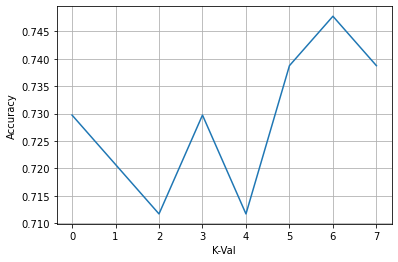

Accuracy Score =  0.7477477477477478
mean k  5
Chosen m =  8


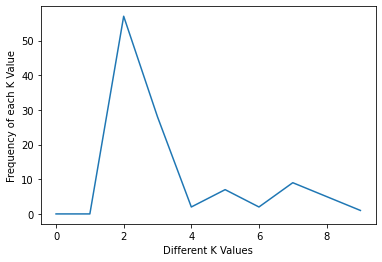

In [ ]:
seedsFile = '/content/sampleData/modifiedDatasets/seeds.csv'
df = pd.read_csv(seedsFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

bestM = 0
bestScore = -1
acc = []
for m in range(2,10):
  predicted, predictedKFrequency, accuracyScore,meank  = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, m)
  acc.append(accuracyScore)
  if(accuracyScore > bestScore):
    bestScore = accuracyScore
    bestM = m
  print("Current Accuracy: ", accuracyScore, " for m =", m)

plt.plot(acc)
plt.xlabel("K-Val")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
predicted, predictedKFrequency, accuracyScore,meank = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, bestM)
print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))
print("mean k ",meank )
print("Chosen m = ", bestM)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

Current Accuracy:  0.4625  for m = 2
Current Accuracy:  0.4875  for m = 3
Current Accuracy:  0.4625  for m = 4
Current Accuracy:  0.5  for m = 5
Current Accuracy:  0.5  for m = 6
Current Accuracy:  0.5125  for m = 7
Current Accuracy:  0.5125  for m = 8
Current Accuracy:  0.5125  for m = 9


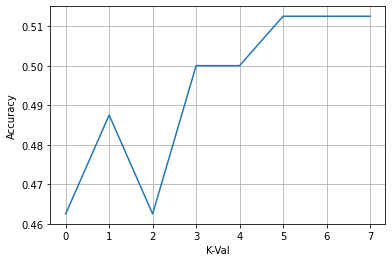

Accuracy Score =  0.5125
mean k  5
Chosen m =  7


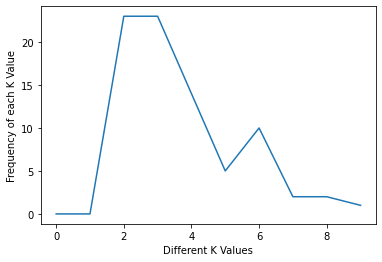

In [ ]:
transfusionFile = '/content/sampleData/modifiedDatasets/transfusion.csv'
df = pd.read_csv(transfusionFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

acc = []
bestM = 0
bestScore = -1
for m in range(2,10):
  predicted, predictedKFrequency, accuracyScore,meank  = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, m)
  acc.append(accuracyScore)
  if(accuracyScore > bestScore):
    bestScore = accuracyScore
    bestM = m
  print("Current Accuracy: ", accuracyScore, " for m =", m)

plt.plot(acc)
plt.xlabel("K-Val")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
predicted, predictedKFrequency, accuracyScore,meank = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, bestM)
print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))
print("mean k ",meank )
print("Chosen m = ", bestM)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

Current Accuracy:  0.5882352941176471  for m = 2
Current Accuracy:  0.6029411764705882  for m = 3
Current Accuracy:  0.5882352941176471  for m = 4
Current Accuracy:  0.6176470588235294  for m = 5
Current Accuracy:  0.5882352941176471  for m = 6
Current Accuracy:  0.5882352941176471  for m = 7
Current Accuracy:  0.5882352941176471  for m = 8
Current Accuracy:  0.5882352941176471  for m = 9


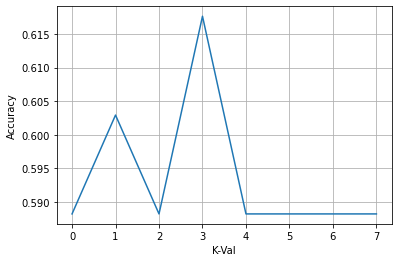

Accuracy Score =  0.6176470588235294
mean k  4
Chosen m =  5


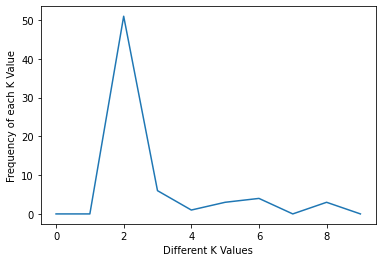

In [ ]:
soyFile = '/content/sampleData/modifiedDatasets/soybeans.csv'
df = pd.read_csv(soyFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)


acc = []
bestM = 0
bestScore = -1
for m in range(2,10):
  predicted, predictedKFrequency, accuracyScore, meank  = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, m)
  acc.append(accuracyScore)
  if(accuracyScore > bestScore):
    bestScore = accuracyScore
    bestM = m
  print("Current Accuracy: ", accuracyScore, " for m =", m)

plt.plot(acc)
plt.xlabel("K-Val")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
predicted, predictedKFrequency, accuracyScore, meank = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, bestM)
print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))
print("mean k ",meank )
print("Chosen m = ", bestM)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

In [ ]:
immunoFile = '/content/sampleData/modifiedDatasets/Immuno.csv'
df = pd.read_csv(immunoFile)
data = np.array(df)
Y = data[:,data.shape[1]-1]
# Y = np.reshape(Y, (len(Y),1))
X = np.delete(data, data.shape[1]-1, 1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)


acc = []
bestM = 0
bestScore = -1
for m in range(2,5):
  predicted, predictedKFrequency, accuracyScore, meank  = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, m)
  acc.append(accuracyScore)
  if(accuracyScore > bestScore):
    bestScore = accuracyScore
    bestM = m
  print("Current Accuracy: ", accuracyScore, " for m =", m)

plt.plot(acc)
plt.xlabel("K-Val")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
predicted, predictedKFrequency, accuracyScore, meank = localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, bestM)
print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))
print("mean k ",meank)
print("Chosen m = ", bestM)
plt.plot(predictedKFrequency)
plt.xlabel("Different K Values")
plt.ylabel("Frequency of each K Value")
plt.show()

Current Accuracy:  0.8219409282700422  for m = 2
Current Accuracy:  0.8210970464135021  for m = 3
